# Geospatial Analysis
Geospatial analysis is the gathering, display, and manipulation of imagery, GPS, satellite photography and historical data, described explicitly in terms of geographic coordinates or implicitly, in terms of a street address, postal code, or forest stand identifier as they are applied to geographic models. In this recipe, we will analyze such data from the city of Chicago. 

We will use a version of pandas called geopandas to analyze this data.

In [15]:
import pandas as pd
import geopandas as gpd

# Basics of Geospatial Data Manipulation
First, let's try to understand how to manipulate geospatial data. Just like in regular Pandass we can load files.

The City of Chicago has a register of landmarks in the city, we can load in this data as a CSV:

In [24]:
df = pd.read_csv('Individual_Landmarks_-_Map.csv') #a regular data frame
df.head()

,LANDMARK NAME,ID,ADDRESS,DATE BUILT,ARCHITECT,LANDMARK DESIGNATION DATE,LATITUDE,LONGITUDE,LOCATION
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,NaN,NaN,07/30/2008,41.931627,-87.692100,"(41.9316266084, -87.6921000957)"
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1886,Adler & Sullivan,10/02/1991,41.819256,-87.602788,"(41.819255751, -87.6027879992)"
2,Manhattan Building,L-139,431 S Dearborn St,1891,William LeBaron Jenney,07/07/1978,41.876066,-87.628964,"(41.8760657234, -87.6289644505)"
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,1901,"Patton, Fisher & Miller",05/26/2004,41.835161,-87.629221,"(41.8351614122, -87.6292212235)"
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1903,Henry L. Newhouse,03/21/1979,41.808530,-87.617204,"(41.808529769, -87.6172043949)"


In [25]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']))
gdf.head()

,LANDMARK NAME,ID,ADDRESS,DATE BUILT,ARCHITECT,LANDMARK DESIGNATION DATE,LATITUDE,LONGITUDE,LOCATION,geometry
0,Vassar Swiss Underwear Company Building,L-265,2543 - 2545 W Diversey Av,NaN,NaN,07/30/2008,41.931627,-87.692100,"(41.9316266084, -87.6921000957)",POINT (-87.69210 41.93163)
1,Mathilde Eliel House,L- 89,4122 S Ellis Av,1886,Adler & Sullivan,10/02/1991,41.819256,-87.602788,"(41.819255751, -87.6027879992)",POINT (-87.60279 41.81926)
2,Manhattan Building,L-139,431 S Dearborn St,1891,William LeBaron Jenney,07/07/1978,41.876066,-87.628964,"(41.8760657234, -87.6289644505)",POINT (-87.62896 41.87607)
3,Machinery Hall at Illinois Institute of Techno...,L- 12,100 W 33rd St,1901,"Patton, Fisher & Miller",05/26/2004,41.835161,-87.629221,"(41.8351614122, -87.6292212235)",POINT (-87.62922 41.83516)
4,Melissa Ann Elam House,L- 88,4726 S Dr Martin Luther King Jr Dr,1903,Henry L. Newhouse,03/21/1979,41.808530,-87.617204,"(41.808529769, -87.6172043949)",POINT (-87.61720 41.80853)


<AxesSubplot:>

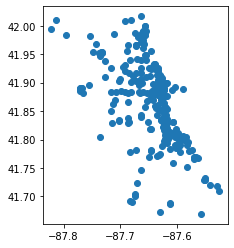

In [26]:
gdf.plot()

Geopandas can also manipulate geometries that are more complicated than a simple set of lat, long points. For example, we can also load shp files which generally are used to define political or administrative boundaries.

<AxesSubplot:>

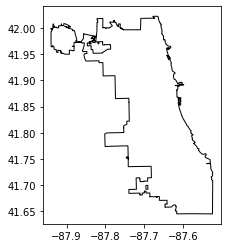

In [29]:
chicago = gpd.read_file('chipoli/chipoli.shp')
chicago.plot(facecolor="none")

<AxesSubplot:>

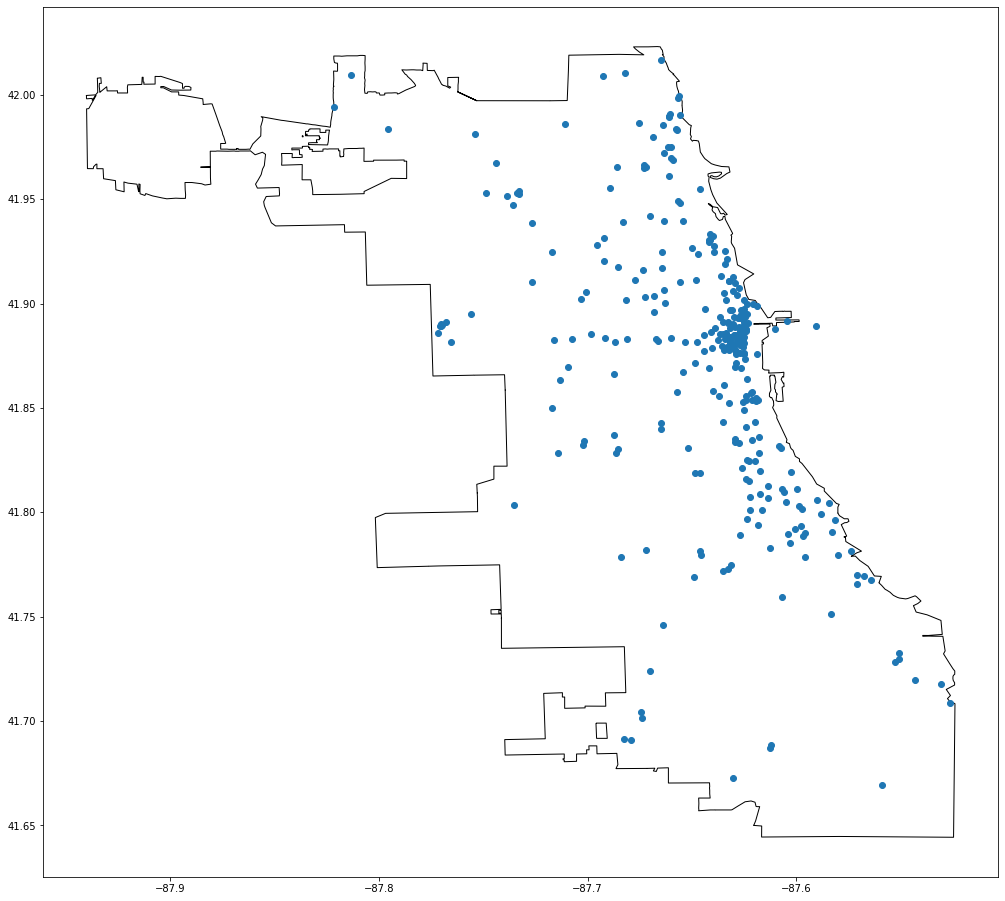

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,16)) 
chicago.plot(facecolor="none", ax=ax)
gdf.plot(ax=ax)

## Finding Nearby Locations

Suppose, I want to find nearby locations to my current position. We use the library `geopy` to convert latitude and longitude differences into distancess. For example, if we want to calculate the distance between landmarks, we can do the following:

In [45]:
import geopy.distance

def distance_between(i,j):
    coords_i = df['LATITUDE'][i],df['LONGITUDE'][i]
    coords_j = df['LATITUDE'][j],df['LONGITUDE'][j]
    
    return geopy.distance.geodesic(coords_i, coords_j).mi

distance_between(1,16)

5.515768144730867

Now, suppose, we would like to answer queries that identify nearby landmarks to you. So you provide the function your current latitude and longitude and it returns all landmarks within a distance of you. Naively, we could do the following:

In [98]:
import datetime

#take a coordinate for me
#find all landmarks within a distance of me
def find_naive(me, landmarks, distance=0.5):
    start = datetime.datetime.now()
    
    rtn = []
    
    N = len(landmarks)
    
    for i in range(N):
        coords_i = landmarks['LATITUDE'][i],landmarks['LONGITUDE'][i]
        
        if geopy.distance.geodesic(me, coords_i).mi < distance:
            rtn.append(i)
    
    print('Elapsed Time find_naive() ', (datetime.datetime.now()-start).total_seconds())
    
    return landmarks.loc[rtn]

#john crerar library: 41.790524,-87.6050427
find_naive((41.790524,-87.6050427), df, distance=0.5)

Elapsed Time find_naive()  0.10173


,LANDMARK NAME,ID,ADDRESS,DATE BUILT,ARCHITECT,LANDMARK DESIGNATION DATE,LATITUDE,LONGITUDE,LOCATION,geometry
32,Frederick C. Robie House,L-176,5757 S Woodlawn Av,1909,Frank Lloyd Wright,09/15/1971,41.789920,-87.595970,"(41.7899203248, -87.5959702794)",POINT (-87.59597 41.78992)
73,Keck-Gottschalk-Keck Apartments,L-126,5551 S University Av,1937,George and William Keck,08/03/1994,41.793551,-87.597704,"(41.793550861, -87.5977036617)",POINT (-87.59770 41.79355)
202,Lorado Taft's Midway Studios,L-192,6016 S Ingleside Dr,1890-1929,"Arch ?, recon:1929;O F Johnson Add:1964;E D Dart",12/01/1993,41.785526,-87.603205,"(41.7855264091, -87.6032052025)",POINT (-87.60321 41.78553)
215,Site of the 1st Self-Sustain Cont. Nuclear Chain,L-184,East Side of S Ellis Ave between 56th & 57th St,1942,"Commern. sculpture,""Nuclear Energy"" Henry Moore",10/27/1971,41.792162,-87.600870,"(41.7921621211, -87.6008698951)",POINT (-87.60087 41.79216)
243,Rockefeller Memorial Chapel,L-178,1156-80 E 59th St,1925-28,Bertram Grosvenor Goodhue Associates,11/03/2004,41.788526,-87.597044,"(41.7885259092, -87.5970443072)",POINT (-87.59704 41.78853)
252,American School of Correspondence,L- 46,850 E 58th St,1907,Pond & Pond,04/15/1995,41.789754,-87.604104,"(41.789753922, -87.6041036284)",POINT (-87.60410 41.78975)


I can plot all of these points on a map using geopandas.

Elapsed Time find_naive()  0.068048


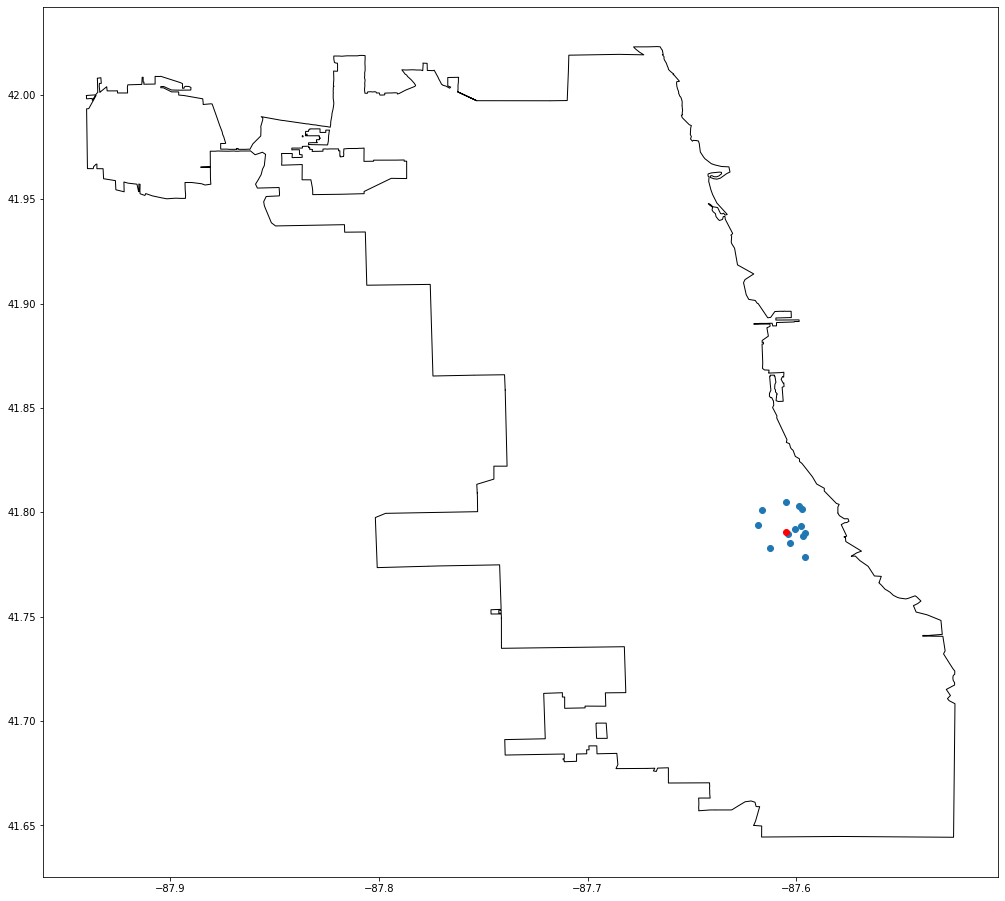

In [99]:
fig, ax = plt.subplots(figsize = (20,16)) 
chicago.plot(facecolor="none", ax=ax)

gdf2 = gpd.GeoDataFrame(find_naive((41.790524,-87.6050427), df, distance=1))
gdf2.plot(ax=ax)

#plot me!
ax.scatter(-87.6050427,41.790524, c='r')

## Chicago Parks Data
Now, we're going to try looking at a larger dataset.

In [58]:
parks = pd.read_csv('CPD_Facilities.csv')
parks

,OBJECTID,PARK_NO,PARK,the_geom,FACILITY_N,FACILITY_T,X_COORD,Y_COORD,GISOBJID
0,1066,9,HAMILTON (ALEXANDER),POINT (-87.63769762611605 41.76299921071406),CULTURAL CENTER,SPECIAL,-87.637698,41.762999,2494
1,1067,9,HAMILTON (ALEXANDER),POINT (-87.63792902987225 41.76281652333733),GYMNASIUM,INDOOR,-87.637929,41.762817,2495
2,1068,9,HAMILTON (ALEXANDER),POINT (-87.63691359952921 41.76084938932824),BASEBALL JR/SOFTBALL,OUTDOOR,-87.636914,41.760849,2496
3,1069,9,HAMILTON (ALEXANDER),POINT (-87.63832013450852 41.76200535544225),BASEBALL JR/SOFTBALL,OUTDOOR,-87.638320,41.762005,2497
4,1070,9,HAMILTON (ALEXANDER),POINT (-87.63805916837423 41.760473845106304),BASEBALL JR/SOFTBALL,OUTDOOR,-87.638059,41.760474,2498
...,...,...,...,...,...,...,...,...,...
4378,0,13,PALMER (POTTER),POINT (-87.61514934360527 41.69118218449023),ARTIFICIAL TURF FIELD,OUTDOOR,-87.615149,41.691182,6584
4379,0,13,PALMER (POTTER),POINT (-87.61494546408909 41.69119447605373),ARTIFICIAL TURF FIELD,OUTDOOR,-87.614945,41.691194,6585
4380,0,13,PALMER (POTTER),POINT (-87.61463315254727 41.691208217133166),ARTIFICIAL TURF FIELD,OUTDOOR,-87.614633,41.691208,6586
4381,0,27,BURNHAM (DANIEL),POINT (-87.5985711196558 41.824963984323965),FITNESS COURSE,OUTDOOR,-87.598571,41.824964,6589


Now, let's bin the data like before. This time let's use finer bins:

<AxesSubplot:>

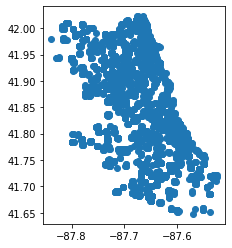

In [61]:
gdf = gpd.GeoDataFrame(parks, geometry=gpd.points_from_xy(parks['X_COORD'], parks['Y_COORD']))
gdf.plot()

<AxesSubplot:>

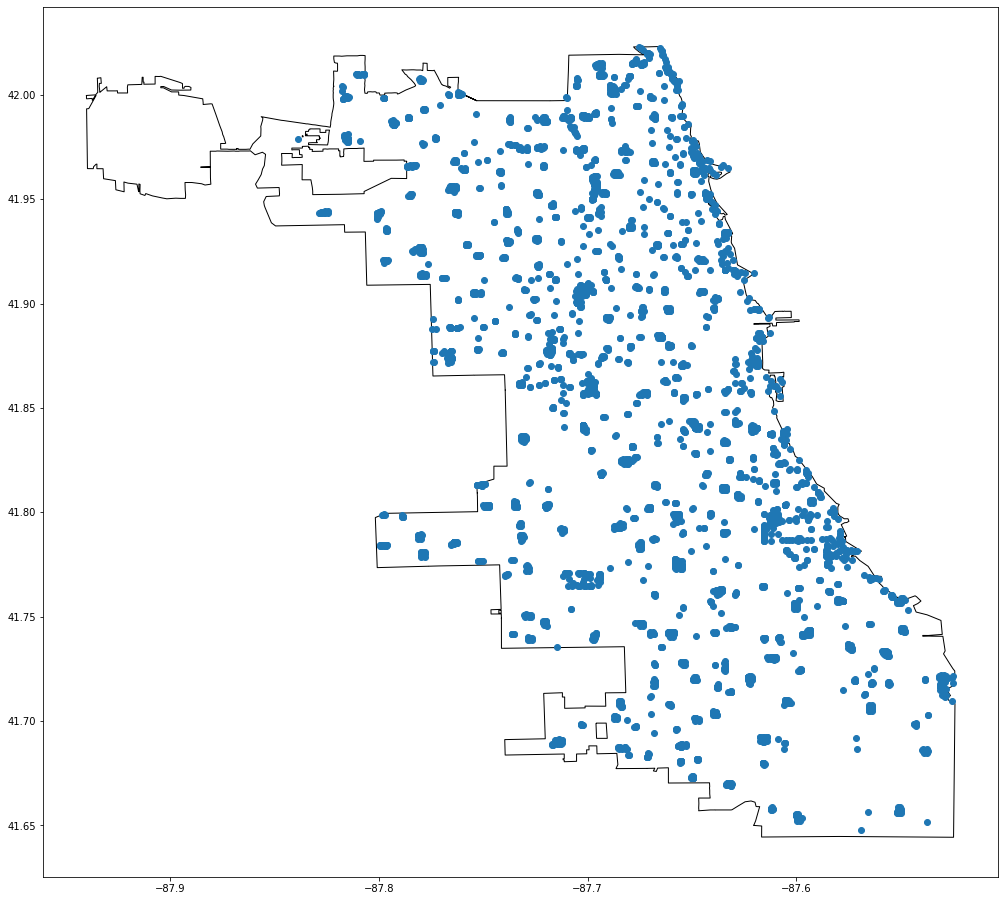

In [62]:
fig, ax = plt.subplots(figsize = (20,16)) 
chicago.plot(facecolor="none", ax=ax)
gdf.plot(ax=ax)

In [100]:
def find_naive(me, landmarks, distance=0.5):
    start = datetime.datetime.now()
    
    rtn = []
    
    N = len(landmarks)
    
    for i in range(N):
        coords_i = landmarks['Y_COORD'][i],landmarks['X_COORD'][i]
        #print(coords_i)
        
        if geopy.distance.geodesic(me, coords_i).mi < distance:
            rtn.append(i)
    
    print('Elapsed Time find_naive() ', (datetime.datetime.now()-start).total_seconds())
    
    return landmarks.loc[rtn]

find_naive((41.790524,-87.6050427), parks, distance=0.3)

Elapsed Time find_naive()  0.878928


,OBJECTID,PARK_NO,PARK,the_geom,FACILITY_N,FACILITY_T,X_COORD,Y_COORD,GISOBJID,geometry
758,1916,1268,MIDWAY PLAISANCE,POINT (-87.60510126633623 41.78675303610635),FOOTBALL/SOCCER COMBO FLD,OUTDOOR,-87.605101,41.786753,3344,POINT (-87.60510 41.78675)
759,1917,1268,MIDWAY PLAISANCE,POINT (-87.60345121701172 41.786763494068744),FOOTBALL/SOCCER COMBO FLD,OUTDOOR,-87.603451,41.786763,3345,POINT (-87.60345 41.78676)
760,1918,1268,MIDWAY PLAISANCE,POINT (-87.6020803199514 41.78681756484859),FOOTBALL/SOCCER COMBO FLD,OUTDOOR,-87.602080,41.786818,3346,POINT (-87.60208 41.78682)
2522,12855,21,WASHINGTON (GEORGE),POINT (-87.60668812419098 41.78675118980899),GARDEN,OUTDOOR,-87.606688,41.786751,5821,POINT (-87.60669 41.78675)
2605,17354,21,WASHINGTON (GEORGE),POINT (-87.6088755046776 41.78953309318619),WETLAND AREA,OUTDOOR,-87.608875,41.789533,6031,POINT (-87.60888 41.78953)


## Using A Tree To Speed Up The Search
R-trees are tree data structures used for spatial access methods, i.e., for indexing multi-dimensional information such as geographical coordinates, rectangles or polygons. It is a specialized tree for doing geospatial lookups. Basically, it can efficiently tell you if two polygons intersect or a point is contained in a polygon.

In [69]:
import rtree
from shapely.geometry import Point

idx = rtree.index.Index() #create an empty index

def build_index(geo_df):
    for i,row in geo_df.iterrows():
        idx.insert(i, row['geometry'].bounds)
        
build_index(parks)    

In [102]:
me = Point(-87.6050427,41.790524).buffer(.005)
me.area

7.84137122636466e-05

In [103]:
fids = [int(i) for i in idx.intersection(me.bounds)]
fids

[1575, 2605, 1556, 2522, 758, 759, 760, 761]

In [104]:
def find_index(me, landmarks, distance=0.5):
    start = datetime.datetime.now()
    
    me = Point(me[1],me[0]).buffer(distance)
    rtn = [int(i) for i in idx.intersection(me.bounds)]
    
    print('Elapsed Time find_index() ', (datetime.datetime.now()-start).total_seconds())
    
    return landmarks.loc[rtn]


find_index((41.790524,-87.6050427), parks, distance=0.004)

Elapsed Time find_index()  0.00153


,OBJECTID,PARK_NO,PARK,the_geom,FACILITY_N,FACILITY_T,X_COORD,Y_COORD,GISOBJID,geometry
2605,17354,21,WASHINGTON (GEORGE),POINT (-87.6088755046776 41.78953309318619),WETLAND AREA,OUTDOOR,-87.608875,41.789533,6031,POINT (-87.60888 41.78953)
2522,12855,21,WASHINGTON (GEORGE),POINT (-87.60668812419098 41.78675118980899),GARDEN,OUTDOOR,-87.606688,41.786751,5821,POINT (-87.60669 41.78675)
758,1916,1268,MIDWAY PLAISANCE,POINT (-87.60510126633623 41.78675303610635),FOOTBALL/SOCCER COMBO FLD,OUTDOOR,-87.605101,41.786753,3344,POINT (-87.60510 41.78675)
759,1917,1268,MIDWAY PLAISANCE,POINT (-87.60345121701172 41.786763494068744),FOOTBALL/SOCCER COMBO FLD,OUTDOOR,-87.603451,41.786763,3345,POINT (-87.60345 41.78676)
760,1918,1268,MIDWAY PLAISANCE,POINT (-87.6020803199514 41.78681756484859),FOOTBALL/SOCCER COMBO FLD,OUTDOOR,-87.602080,41.786818,3346,POINT (-87.60208 41.78682)
